In [1]:
%load_ext autoreload
%autoreload 2

In [43]:
from argparse import Namespace
import torch
import matplotlib.pyplot as plt

In [4]:
from turboflow.models.phyrff import plDivFreeRFFNet

path_to_best_model = '/home/dicarlo_d/Documents/Code/TurboSuperResultion/.torch_checkpoints/Turb2D-kMFN-SGU_32x32x32_gabor_freqs_spect-epoch=89-val_loss=0.00.ckpt'
model = plDivFreeRFFNet.load_from_checkpoint(path_to_best_model)

In [11]:
t = torch.linspace(0.5, 0.6, 1)
x = torch.linspace(0, 1, 32)
y = torch.linspace(0, 1, 32)

X = torch.stack(torch.meshgrid(t, x, y))
X = torch.flatten(X, start_dim=1)
X = X.T
print(X.shape)

torch.Size([1024, 3])


In [14]:
y = model(X)[0]

torch.Size([1024, 65536])


In [18]:
feats = {} #an empty dictionary
def hook_func(m , inp ,op):
   feats['feat'] = op.detach()

In [20]:
model.mfn.register_forward_hook(hook_func)
y = model(X)[0]

In [25]:
B = X.shape[0]
F = feats['feat'].reshape(B, 2, 128, 128, 2)

In [35]:
print(F.shape)
Ek = torch.sum(F**2, dim=-1)
Ek = torch.mean(Ek, dim=1)
Ek = torch.flatten(Ek, start_dim=1)
print(Ek.shape)

torch.Size([1024, 2, 128, 128, 2])
torch.Size([1024, 16384])


In [41]:
freqs = model.freq.freqs.reshape(2, 128, 128)
freqs = torch.norm(freqs, dim=0).flatten()
val, idx = torch.sort(freqs)

tensor([    0,     1,   128,  ..., 16255, 16382, 16383])
tensor([0.0000, 0.0079, 0.0079,  ..., 1.4087, 1.4087, 1.4142])


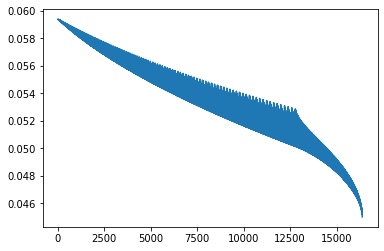

In [44]:
print(idx)
print(val)

plt.plot(Ek[100, idx])